<a href="https://colab.research.google.com/github/Asuna-sama-1/Horror_movies/blob/main/horror_movie_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libararies 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load data

In [2]:
movies = pd.read_csv("rotten_tomatoes_movies.csv")
movies.tail(2)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
17710,m/zulu,Zulu,"In 1879, the Zulu nation hands colonial Britis...",Zulu patiently establishes a cast of colorful ...,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,...,Paramount Pictures,Fresh,96.0,23.0,Upright,91.0,30193.0,6,22,1
17711,m/zulu_dawn,Zulu Dawn,Sir Henry Bartle Frere's (John Mills) vastly o...,NaN,PG,"Action & Adventure, Art House & International,...",Douglas Hickox,"Cy Endfield, Anthony Storey","Burt Lancaster, Peter O'Toole, Simon Ward, Joh...",1979-12-14,...,Tango Entertainment,Rotten,50.0,8.0,Upright,62.0,4469.0,0,4,4


In [3]:
movies.genres.value_counts()

Drama                                                                                  1887
Comedy                                                                                 1263
Comedy, Drama                                                                           863
Drama, Mystery & Suspense                                                               731
Art House & International, Drama                                                        589
                                                                                       ... 
Art House & International, Classics, Cult Movies, Horror, Science Fiction & Fantasy       1
Action & Adventure, Cult Movies, Drama, Science Fiction & Fantasy                         1
Art House & International, Documentary, Sports & Fitness                                  1
Action & Adventure, Drama, Mystery & Suspense, Special Interest                           1
Action & Adventure, Drama, Horror, Kids & Family, Mystery & Suspense            

## Useful functions

In [4]:
def missing_data_pec(df):
  total = df.isnull().sum().sort_values(ascending=False)
  percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
  missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
  return missing_data

In [5]:
def value_cnt_norm_cal(df,feature):
    ftr_value_cnt = df[feature].value_counts()
    ftr_value_cnt_norm = df[feature].value_counts(normalize=True) * 100
    ftr_value_cnt_concat = pd.concat([ftr_value_cnt, ftr_value_cnt_norm], axis=1)
    ftr_value_cnt_concat.columns = ['Count', 'Frequency (%)']
    return ftr_value_cnt_concat

In [6]:
def create_bar_plot(df,feature):
  fig, ax = plt.subplots(figsize=(5,8))
  sns.barplot(x=value_cnt_norm_cal(df,feature).index,y=value_cnt_norm_cal(df,feature).values[:,0])
  plt.xlabel('{}'.format(feature))
  plt.ylabel('Count')
  plt.title('{} count'.format(feature))
  return plt.show()

In [7]:
def create_box_plot(df,cat_feature,num_feature):
  print((df.groupby(cat_feature)[num_feature].mean().sort_values()))
  fig, ax = plt.subplots(figsize=(25,8))
  sns.boxplot(x=df[cat_feature],y=df[num_feature])
  plt.title('{} grouped by {}'.format(num_feature,cat_feature))
  return plt.show()

In [8]:
def top_n_bar_plot(df,feature,n):
  fig, ax = plt.subplots(figsize=(20,4))
  sns.barplot(x=value_cnt_norm_cal(df,feature).index[:n],y=value_cnt_norm_cal(df,feature).values[:n,0])
  ax.set_xticklabels(labels=value_cnt_norm_cal(df,feature).index,rotation=45,ha='right')
  plt.xlabel('{}'.format(feature))
  plt.ylabel('Count')
  plt.title('Top {} {} count'.format(n,feature))
  return plt.show()

In [9]:
def print_info(df,feature):
   print('Description:\n{}'.format(df[feature].describe()))
   print('*'*50)
   print('Object type:\n{}'.format(df[feature].dtype))
   print('*'*50)
   value_cnt = value_cnt_norm_cal(df,feature)
   print('Value count:\n{}'.format(value_cnt))

In [10]:
def create_hist_plot(df, feature, num_bin):
  if feature in ['original_release_date','streaming_release_date']:
    # convert to datetime
    df[feature] = pd.to_datetime(df[feature])
    fig, ax = plt.subplots(figsize=(15,8))
    sns.histplot(df[feature],bins=num_bin,kde=True)
    plt.title('{} distribution'.format(feature))
    return plt.show()
  else:
    fig, ax = plt.subplots(figsize=(15,8))
    sns.histplot(df[feature],bins=num_bin,kde=True)
    plt.title('{} distribution'.format(feature))
    return plt.show()

## Genre vs Rating

In [11]:
total = movies.isnull().sum().sort_values(ascending=False)
percent = (movies.isnull().sum()/movies.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data

,Total,Percent
critics_consensus,8578,0.484304
authors,1542,0.087060
original_release_date,1166,0.065831
production_company,499,0.028173
audience_status,448,0.025294
streaming_release_date,384,0.021680
actors,352,0.019874
movie_info,321,0.018123
runtime,314,0.017728
audience_count,297,0.016768


In [12]:
movies = movies[~movies['genres'].isnull()]

In [13]:
horror_count=movies['genres'].str.contains('Horror').sum()
if horror_count>0:
    print ("There are {m} horror movies".format(m=horror_count))

There are 2043 horror movies


In [14]:
horror_movies = movies[movies['genres'].str.contains('Horror')]

In [19]:
# generate new feature main_genre
movies['main_genre'] = movies['genres'].str.split(',').str[0]
movies['main_genre']

0        Action & Adventure
1                    Comedy
2                    Comedy
3                  Classics
4        Action & Adventure
                ...        
17707                 Drama
17708    Action & Adventure
17709    Action & Adventure
17710              Classics
17711    Action & Adventure
Name: main_genre, Length: 17693, dtype: object

In [21]:
value_cnt_norm_cal(movies,'main_genre')

,Count,Frequency (%)
Drama,3789,21.415249
Comedy,3725,21.053524
Action & Adventure,3551,20.070084
Art House & International,2021,11.422597
Documentary,1725,9.749618
Classics,1110,6.273668
Horror,943,5.329791
Animation,379,2.142090
Mystery & Suspense,289,1.633414
Kids & Family,46,0.259990


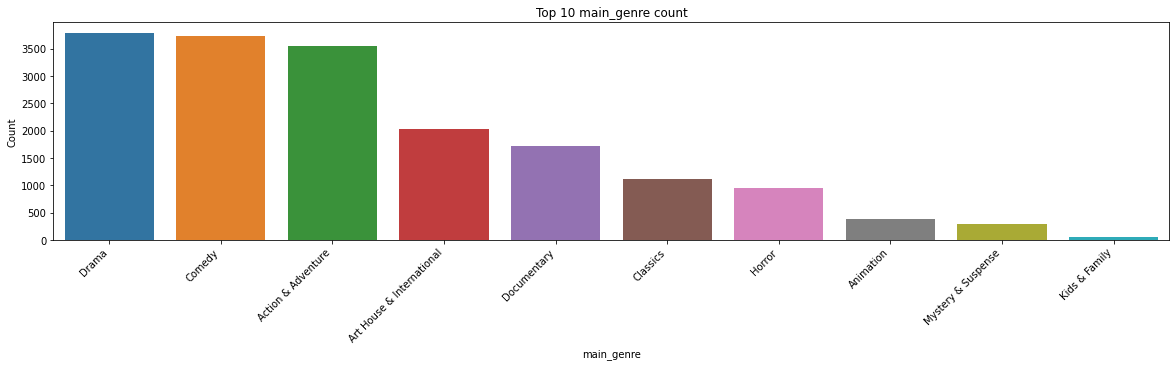

In [22]:
top_n_bar_plot(movies,'main_genre',10)

According to the number of movies are relased. Drama, Comedy, and acton&adventures are the popular movie geners. 

main_genre
Television                   28.000000
Horror                       42.178303
Cult Movies                  43.272727
Romance                      46.923077
Mystery & Suspense           48.031690
Western                      54.777778
Comedy                       55.740153
Science Fiction & Fantasy    56.684211
Action & Adventure           57.839615
Kids & Family                59.347826
Drama                        60.298980
Animation                    65.251989
Art House & International    67.039461
Musical & Performing Arts    68.347826
Classics                     71.693694
Documentary                  74.269042
Special Interest             78.500000
Name: audience_rating, dtype: float64


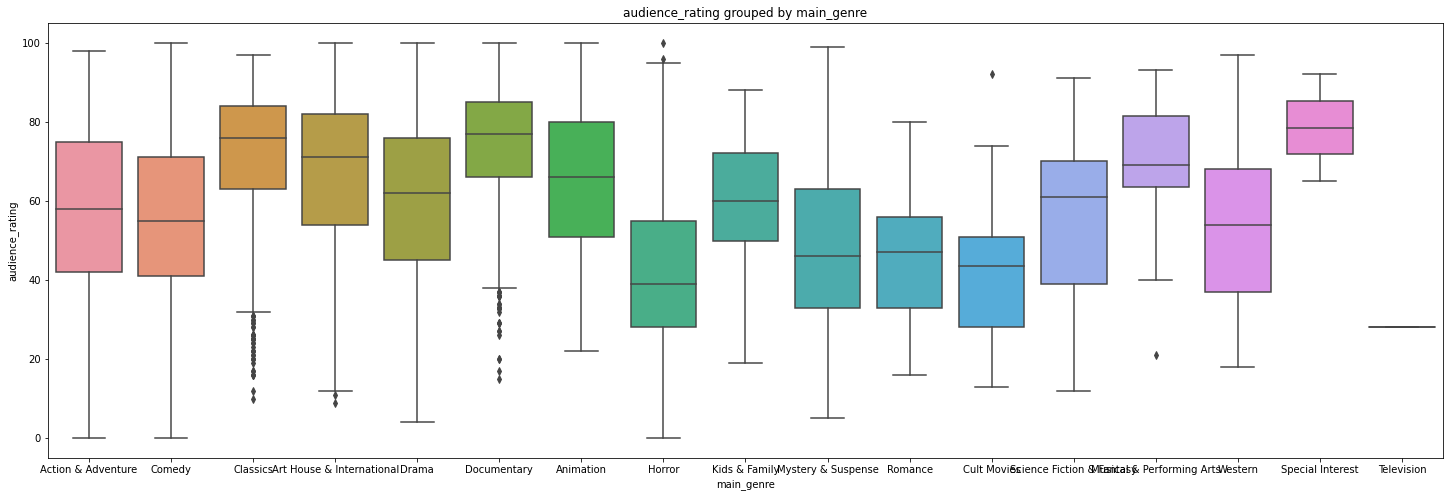

In [23]:
create_box_plot(movies,'main_genre','audience_rating')

main_genre
Television                   36.000000
Horror                       46.603191
Mystery & Suspense           47.777003
Romance                      47.928571
Cult Movies                  49.000000
Comedy                       51.737692
Action & Adventure           54.184359
Science Fiction & Fantasy    58.075000
Drama                        59.766870
Kids & Family                59.891304
Animation                    63.882979
Western                      65.000000
Musical & Performing Arts    70.730769
Art House & International    71.829450
Classics                     79.120721
Documentary                  81.679070
Special Interest             83.333333
Name: tomatometer_rating, dtype: float64


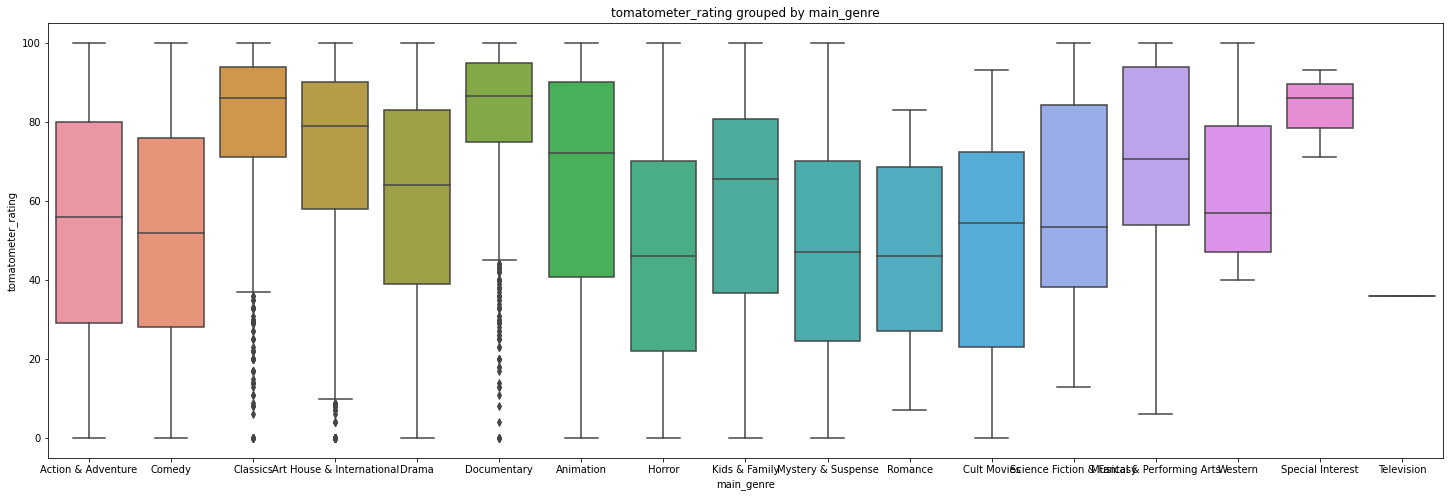

In [24]:
create_box_plot(movies,'main_genre','tomatometer_rating')

From the boxplots above, we can see that horror and Television genres have the lowest rating according to both audience_rating and tomatometer_rating. Since Television is not really a movie genre, we can conclude that horror is the least popular genre with lower ratings.

In the following analysis, let's see why horror movies are usually resulting in lower ratings


# Horror Movie Analysis 

In [ ]:
horror_movies.shape

(2043, 23)

In [ ]:
horror_movies.tail(4)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,main_genre
17698,m/zombie_strippers,Zombie Strippers,"With too many wars and too few soldiers, a lab...","Though intentionally campy, Zombie Strippers s...",R,"Comedy, Horror",Jay Lee,Jay Lee,"Jenna Jameson, Robert Englund, Roxy Saint, Joe...",2008-04-18,...,Rotten,39.0,64.0,Spilled,30.0,7652.0,16,25,39,Comedy
17699,m/zombieland,Zombieland,"After a virus turns most people into zombies, ...","Wickedly funny and featuring plenty of gore, Z...",R,"Comedy, Horror",Ruben Fleischer,"Rhett Reese, Paul Wernick","Woody Harrelson, Jesse Eisenberg, Emma Stone, ...",2009-10-02,...,Certified-Fresh,89.0,255.0,Upright,86.0,643354.0,49,227,28,Comedy
17700,m/zombieland_double_tap,Zombieland: Double Tap,"Zombie slayers Tallahassee, Columbus, Wichita ...",Zombieland: Double Tap makes up for a lack of ...,R,"Action & Adventure, Comedy, Horror",Ruben Fleischer,"Rhett Reese, Paul Wernick, Dave Callaham","Woody Harrelson, Jesse Eisenberg, Emma Stone, ...",2019-10-18,...,Fresh,68.0,244.0,NaN,88.0,11200.0,31,166,78,Action & Adventure
17701,m/zombies_of_mass_destruction,ZMD: Zombies of Mass Destruction,An Iranian college student (Janette Armand) an...,NaN,R,"Comedy, Horror",Kevin Hamedani,"Kevin Hamedani, Ramon Isao","Bill Johns, Cooper Hopkins, Doug Fahl, Janette...",2009-04-18,...,Fresh,67.0,6.0,Spilled,34.0,2586.0,0,4,2,Comedy


In [ ]:
horror_movies.describe()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,2015.000000,2038.000000,2038.000000,2024.000000,2.023000e+03,2043.000000,2043.000000,2043.000000
mean,94.761787,51.575074,46.881256,46.402668,9.713929e+04,9.494371,25.886442,20.959863
std,13.035961,28.014023,60.641398,19.806089,1.255888e+06,12.438855,43.622185,29.868539
min,28.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000
25%,87.000000,28.000000,10.000000,31.000000,8.085000e+02,1.000000,4.000000,4.000000
50%,93.000000,55.000000,21.000000,44.000000,4.869000e+03,4.000000,10.000000,8.000000
75%,100.000000,75.000000,59.000000,61.000000,2.503800e+04,13.000000,27.000000,22.000000
max,192.000000,100.000000,535.000000,100.000000,3.258201e+07,63.000000,497.000000,261.000000


In [ ]:
horror_movies.columns

Index(['rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count',
       'main_genre'],
      dtype='object')

## **1. Missing Data**

In [25]:
# check duplicates
horror_movies.duplicated().sum()

0

In [26]:
missing_data_pec(horror_movies)

,Total,Percent
critics_consensus,1089,0.533040
original_release_date,187,0.091532
authors,118,0.057758
production_company,82,0.040137
audience_status,42,0.020558
directors,30,0.014684
streaming_release_date,29,0.014195
movie_info,29,0.014195
runtime,28,0.013705
audience_count,20,0.009790


## **2. Univariare analysis**

### 2.1 Content rating

In [ ]:
print_info(horror_movies,'content_rating')

Description:
count     2043
unique       6
top          R
freq      1129
Name: content_rating, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
       Count  Frequency (%)
R       1129      55.261870
NR       590      28.879099
PG-13    201       9.838473
PG        93       4.552129
G         23       1.125795
NC17       7       0.342633


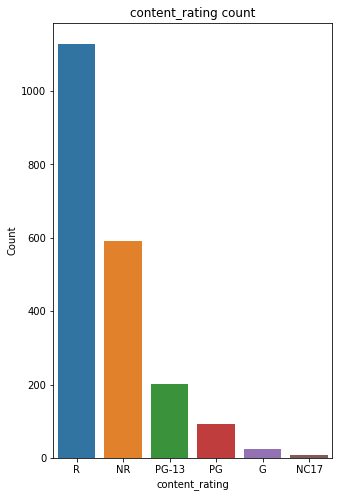

In [ ]:
create_bar_plot(horror_movies,'content_rating')

Majority of Horror movies are rated R (60.5%) or NR (28.6%)

### 2.2 Release date

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


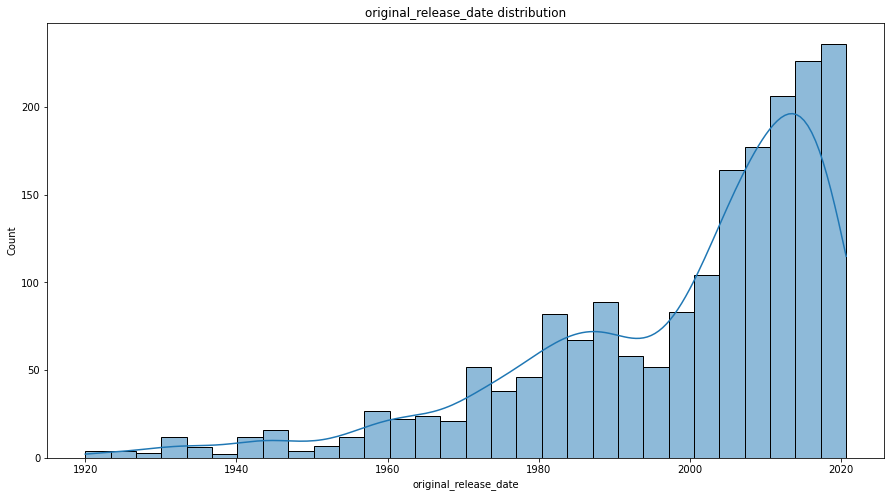

In [ ]:
create_hist_plot(horror_movies, 'original_release_date',30)

In [ ]:
horror_movies[horror_movies['original_release_date'] ==horror_movies.original_release_date.min()]

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
11714,m/penalty,The Penalty,"As a child, Blizzard (Lon Chaney) is involved ...",NaN,NR,"Classics, Drama, Horror, Mystery & Suspense",Wallace Worsley Sr.,"Charles Kenyon, Gouveneur Morris, Philip Lonergan","Lon Chaney, Kenneth Harlan, Wilson Hummell, Do...",1920-01-01,...,Samuel Goldwyn Company,Fresh,80.0,5.0,Upright,76.0,525.0,0,4,1
15619,m/the_phantom_carriage,The Phantom Carriage,"On New Year's Eve, the driver of a ghostly car...",NaN,NR,"Art House & International, Drama, Horror, Scie...",Victor Sjöström,Victor Sjöström,"Victor Sjöström, Hilda Borgström, Astrid Holm,...",1920-01-01,...,Criterion Collection,Fresh,100.0,15.0,Upright,90.0,1478.0,1,15,0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


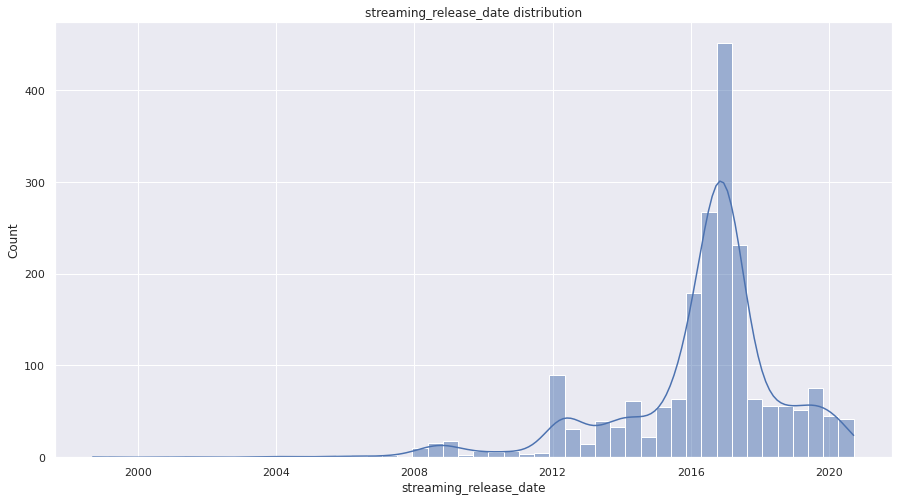

In [ ]:
create_hist_plot(horror_movies, 'streaming_release_date',50) 

In [ ]:
horror_movies.streaming_release_date.min()

Timestamp('1998-09-08 00:00:00')

In [ ]:
horror_movies[horror_movies['streaming_release_date'] ==horror_movies.streaming_release_date.min()]

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
5247,m/dead_alive,Dead Alive,Overprotective mother Vera Cosgrove (Elizabeth...,The delightfully gonzo tale of a lovestruck te...,R,"Comedy, Horror, Science Fiction & Fantasy",Peter Jackson,"Peter Jackson, Stephen Sinclair, Fran Walsh","Timothy Balme, Diana Peñalver, Elizabeth Moody...",1993-02-12,...,Trimark Pictures,Certified-Fresh,88.0,42.0,Upright,87.0,64580.0,7,37,5


### 2.3 Runtime

In [ ]:
print_info(horror_movies,'runtime')

Description:
count    2015.000000
mean       94.761787
std        13.035961
min        28.000000
25%        87.000000
50%        93.000000
75%       100.000000
max       192.000000
Name: runtime, dtype: float64
**************************************************
Object type:
float64
**************************************************
Value count:
       Count  Frequency (%)
90.0     151       7.493797
95.0      90       4.466501
88.0      86       4.267990
92.0      86       4.267990
89.0      85       4.218362
...      ...            ...
172.0      1       0.049628
150.0      1       0.049628
138.0      1       0.049628
137.0      1       0.049628
130.0      1       0.049628

[97 rows x 2 columns]


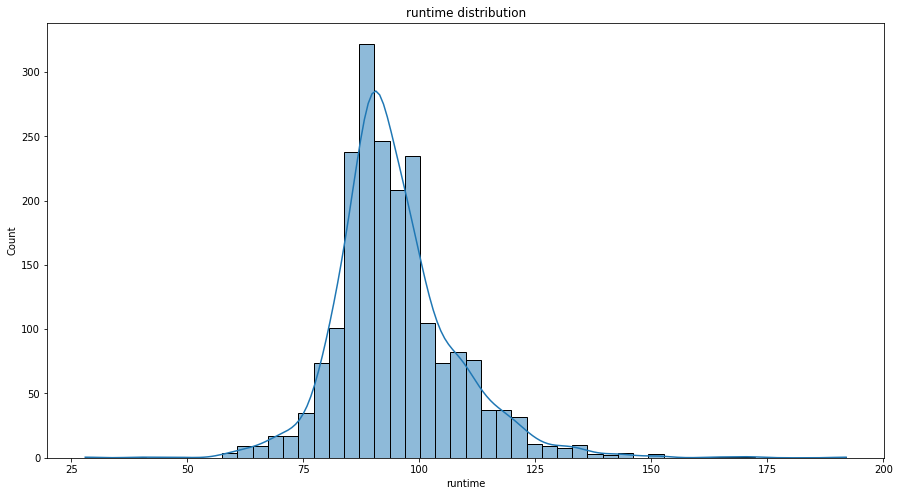

In [ ]:
create_hist_plot(horror_movies, 'runtime',50)

### 2.4 production company

In [ ]:
print_info(horror_movies,'production_company')

Description:
count                   1961
unique                   671
top       Universal Pictures
freq                      80
Name: production_company, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                                  Count  Frequency (%)
Universal Pictures                   80       4.079551
Warner Bros. Pictures                51       2.600714
Sony Pictures Home Entertainment     50       2.549720
Paramount Pictures                   48       2.447731
IFC Films                            48       2.447731
...                                 ...            ...
Area 23a                              1       0.050994
Greengrass Productions                1       0.050994
Random Media                          1       0.050994
Schattenkante                         1       0.050994
Typecast Pictures                     1       0.050994

[671 rows x 2 columns]


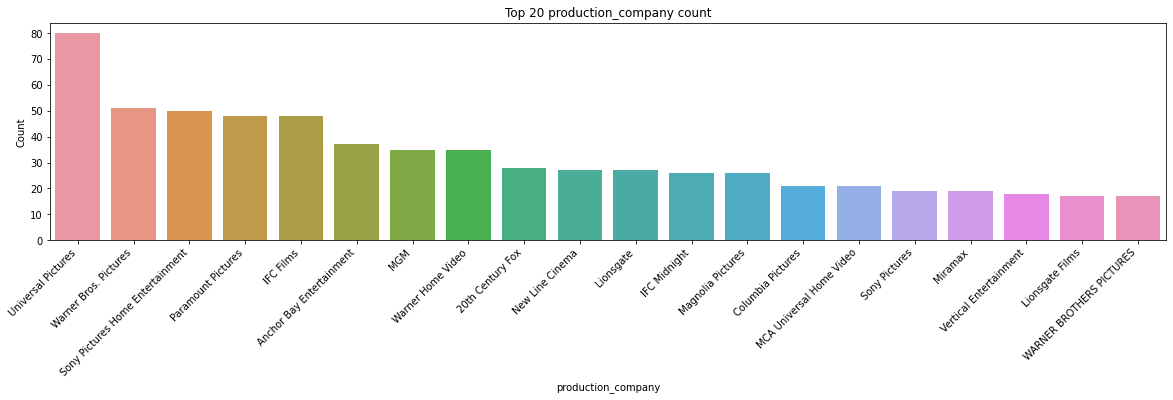

In [ ]:
top_n_bar_plot(horror_movies,'production_company',20)

In [ ]:
horror_movies['streaming_year']=pd.DatetimeIndex(horror_movies['streaming_release_date']).year
horror_movies.groupby(['production_company','streaming_year']).count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


rotten_tomatoes_link  movie_title  \
production_company      streaming_year                                      
20th Century Fox        2012.0                             1            1   
                        2015.0                            15           15   
                        2016.0                             5            5   
                        2017.0                             6            6   
                        2018.0                             1            1   
...                                                      ...          ...   
Zeitgeist Films         2017.0                             1            1   
Zentropa Entertainments 2017.0                             1            1   
Zik Zak Filmworks       2017.0                             1            1   
iHQ                     2017.0                             1            1   
levelFILM               2017.0                             1            1   

                                        movie_info  critics_consensus  \
production_company      streaming_year                                  
20th Century Fox        2012.0                   1                  1   
                        2015.0                  15                 14   
                        2016.0                   5                  4   
                        2017.0                   6                  5   
                        2018.0                   1                  1   
...                                            ...                ...   
Zeitgeist Films         2017.0                   1                  1   
Zentropa Entertainments 2017.0                   1                  0   
Zik Zak Filmworks       2017.0                   1                  0   
iHQ                     2017.0                   1                  0   
levelFILM               2017.0                   1                  0   

                                        content_rating  genres  directors  \
production_company      streaming_year                                      
20th Century Fox        2012.0                       1       1          1   
                        2015.0                      15      15         15   
                        2016.0                       5       5          5   
                        2017.0                       6       6          6   
                        2018.0                       1       1          1   
...                                                ...     ...        ...   
Zeitgeist Films         2017.0                       1       1          1   
Zentropa Entertainments 2017.0                       1       1          1   
Zik Zak Filmworks       2017.0                       1       1          1   
iHQ                     2017.0                       1       1          1   
levelFILM               2017.0                       1       1          1   

                                        authors  actors  \
production_company      streaming_year                    
20th Century Fox        2012.0                1       1   
                        2015.0               15      15   
                        2016.0                5       5   
                        2017.0                6       6   
                        2018.0                1       1   
...                                         ...     ...   
Zeitgeist Films         2017.0                1       1   
Zentropa Entertainments 2017.0                1       1   
Zik Zak Filmworks       2017.0                1       1   
iHQ                     2017.0                1       1   
levelFILM               2017.0                1       1   

                                        original_release_date  ...  runtime  \
production_company      streaming_year                         ...            
20th Century Fox        2012.0                              1  ...        1   
                        2015.0                             15  ...       15   
  

In [ ]:
sum(horror_movies.groupby('production_company').streaming_year.min().values==2016)

218

In [ ]:
sum(horror_movies.groupby('production_company').streaming_year.min().values==2016)/len(horror_movies.production_company.value_counts())*100

32.48882265275708

original_year
1920.0     2
1924.0     1
1925.0     1
1929.0     1
1931.0     2
          ..
2012.0    23
2013.0    42
2014.0    44
2015.0    34
2016.0    45
Name: rotten_tomatoes_link, Length: 76, dtype: int64


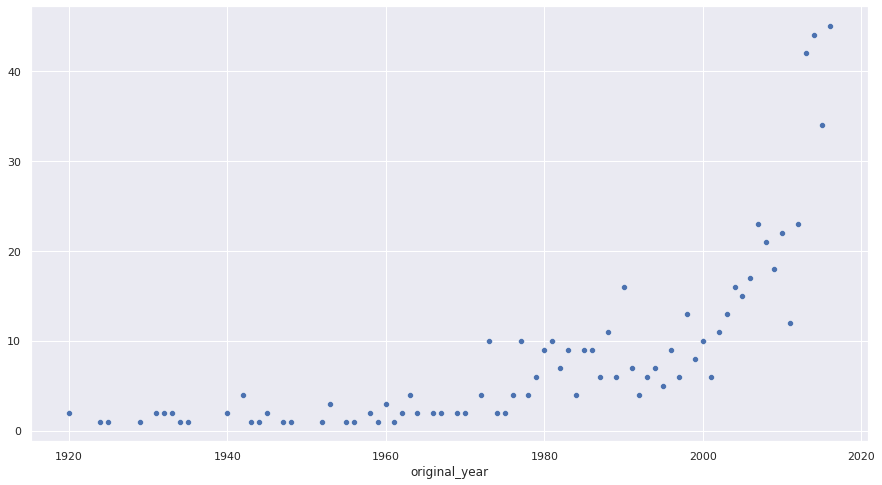

In [ ]:
t3=horror_movies[horror_movies['streaming_year'] == 2016].groupby('original_year').rotten_tomatoes_link.count()
print(t3)
sns.scatterplot(x = t3.index, y = t3.values)

167/671 production companies first started streaming horror movies in 2016



In [ ]:
t3.loc[:2016]/len(horror_movies.rotten_tomatoes_link)*100

original_year
1920.0    0.097895
1924.0    0.048948
1925.0    0.048948
1929.0    0.048948
1931.0    0.097895
            ...   
2012.0    1.125795
2013.0    2.055800
2014.0    2.153696
2015.0    1.664219
2016.0    2.202643
Name: rotten_tomatoes_link, Length: 76, dtype: float64

In [ ]:
t2= horror_movies.groupby(['streaming_year']).production_company.value_counts().sort_values(ascending=False)
print(t2)

streaming_year  production_company              
2015.0          Universal Pictures                  26
2016.0          Universal Pictures                  26
2012.0          Sony Pictures Home Entertainment    22
2016.0          IFC Films                           22
                Magnolia Pictures                   18
                                                    ..
                Ghost House Pictures                 1
                Glass Eye Pix                        1
                Glass Eye Pix/Dark Sky               1
                Global Cinema Distribution           1
2020.0          Warner Bros. Home Entertainment      1
Name: production_company, Length: 1037, dtype: int64


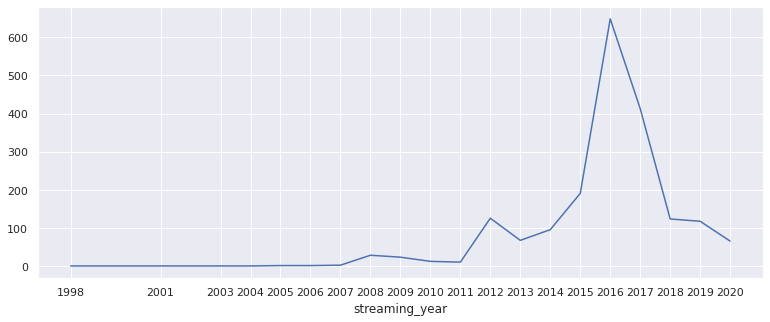

In [ ]:
plt.figure(figsize = (13,5))
ax = sns.lineplot(x=t2.index, y = t2.values)
ax.set_xticks(t2.index)

### 2.5 tomatometer status

In [ ]:
print_info(horror_movies,'tomatometer_status')

Description:
count       2038
unique         3
top       Rotten
freq        1140
Name: tomatometer_status, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                 Count  Frequency (%)
Rotten            1140      55.937193
Fresh              690      33.856722
Certified-Fresh    208      10.206084


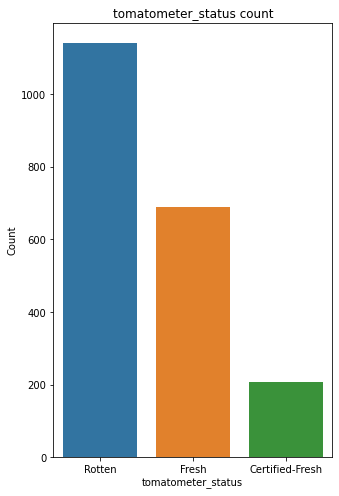

In [ ]:
create_bar_plot(horror_movies,'tomatometer_status')

### 2.6 tomatometer rating 

In [ ]:
print_info(horror_movies,'tomatometer_rating')

Description:
count    2038.000000
mean       51.575074
std        28.014023
min         0.000000
25%        28.000000
50%        55.000000
75%        75.000000
max       100.000000
Name: tomatometer_rating, dtype: float64
**************************************************
Object type:
float64
**************************************************
Value count:
       Count  Frequency (%)
0.0       72       3.532875
50.0      65       3.189401
67.0      62       3.042198
100.0     53       2.600589
40.0      47       2.306183
...      ...            ...
34.0       6       0.294406
51.0       5       0.245339
5.0        3       0.147203
1.0        1       0.049068
99.0       1       0.049068

[100 rows x 2 columns]


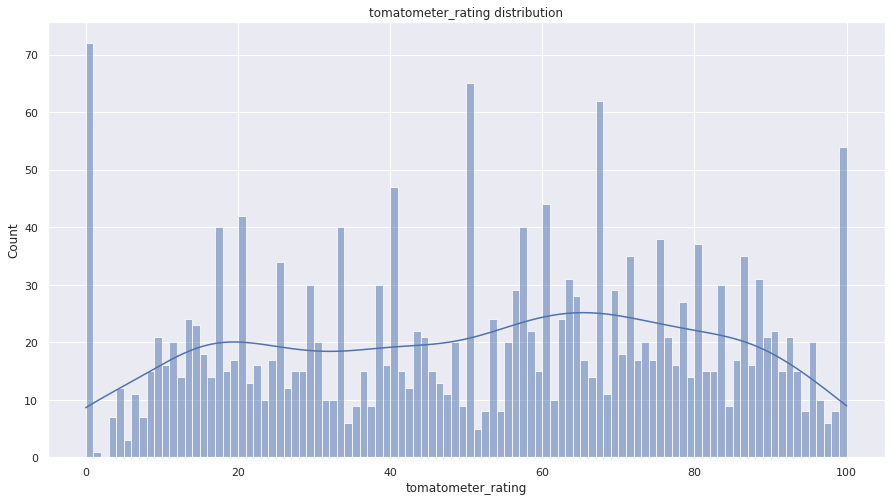

In [ ]:
create_hist_plot(horror_movies, 'tomatometer_rating',100)

get rid of 0 and 100 extreme values. now let's see the ditribution again 

Description:
count    1913.000000
mean       52.174595
std        25.895244
min         1.000000
25%        29.000000
50%        55.000000
75%        74.000000
max        99.000000
Name: tomatometer_rating, dtype: float64
**************************************************
Object type:
float64
**************************************************
Value count:
      Count  Frequency (%)
50.0     65       3.397804
67.0     62       3.240983
40.0     47       2.456874
60.0     44       2.300052
20.0     42       2.195504
...     ...            ...
34.0      6       0.313643
51.0      5       0.261370
5.0       3       0.156822
1.0       1       0.052274
99.0      1       0.052274

[98 rows x 2 columns]


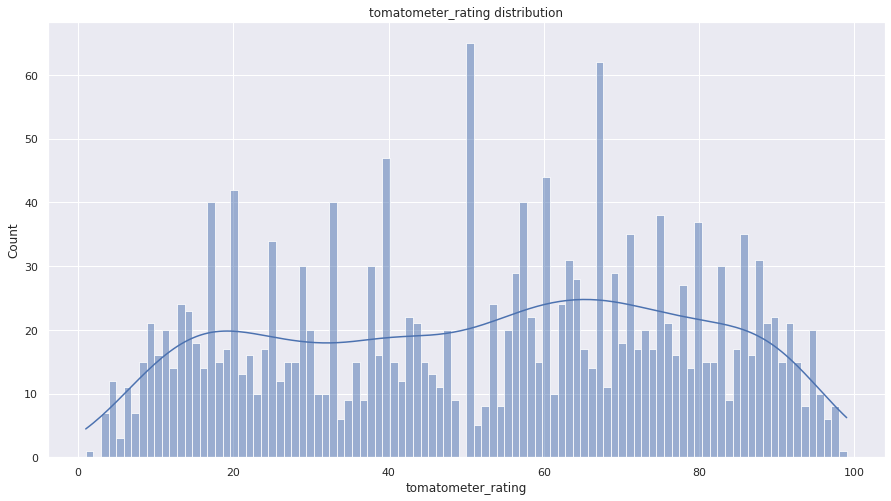

In [125]:
no_extre = horror_movies[(horror_movies.tomatometer_rating >0) & (horror_movies.tomatometer_rating <100) ]
print_info(no_extre, 'tomatometer_rating')
create_hist_plot(no_extre, 'tomatometer_rating',100)

in year 2016, Quantity is high, what about quality?

count    664.000000
mean      50.153614
std       27.941879
min        0.000000
25%       27.000000
50%       50.500000
75%       74.000000
max      100.000000
Name: tomatometer_rating, dtype: float64


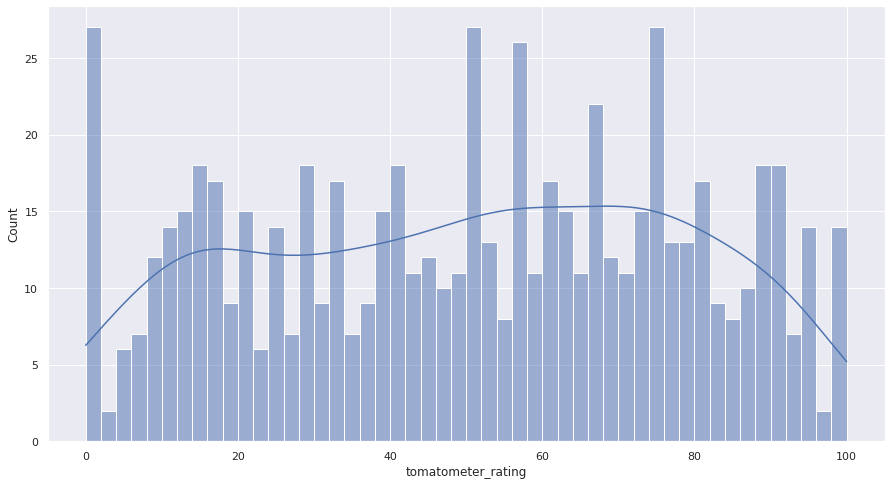

In [ ]:
print(horror_movies[horror_movies['streaming_year']==2016].tomatometer_rating.describe())
fig, ax = plt.subplots(figsize=(15,8))
sns.histplot(horror_movies[horror_movies['streaming_year']==2016].tomatometer_rating,bins=50,kde=True)
plt.show()

### 2.7 tomatometer count

Description:
count    2038.000000
mean       46.881256
std        60.641398
min         5.000000
25%        10.000000
50%        21.000000
75%        59.000000
max       535.000000
Name: tomatometer_count, dtype: float64
**************************************************
Object type:
float64
**************************************************
Value count:
       Count  Frequency (%)
5.0      113       5.544652
6.0      107       5.250245
7.0      107       5.250245
8.0       91       4.465162
9.0       78       3.827282
...      ...            ...
196.0      1       0.049068
293.0      1       0.049068
120.0      1       0.049068
166.0      1       0.049068
244.0      1       0.049068

[226 rows x 2 columns]


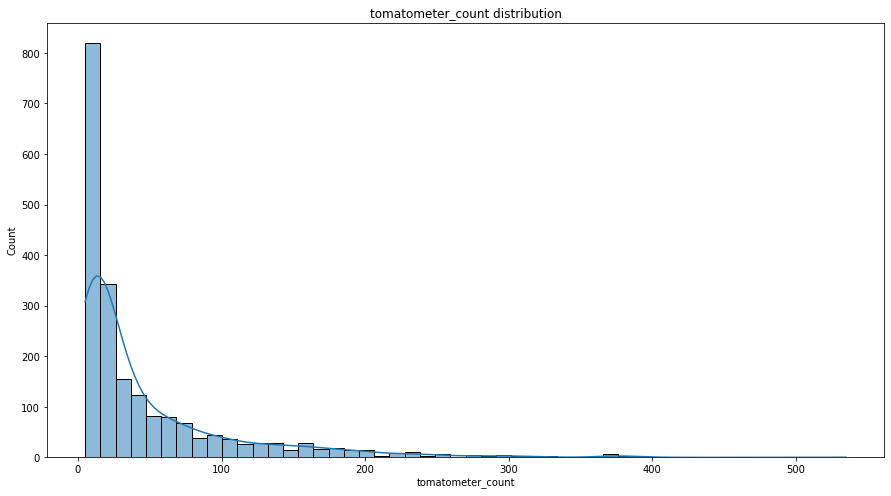

In [ ]:
print_info(horror_movies,'tomatometer_count')
create_hist_plot(horror_movies, 'tomatometer_count',50)

### 2.8 audience status and counts

Description:
count    2.023000e+03
mean     9.713929e+04
std      1.255888e+06
min      5.000000e+00
25%      8.085000e+02
50%      4.869000e+03
75%      2.503800e+04
max      3.258201e+07
Name: audience_count, dtype: float64
**************************************************
Object type:
float64
**************************************************
Value count:
         Count  Frequency (%)
19.0         5       0.247158
8.0          5       0.247158
16.0         4       0.197726
361.0        4       0.197726
11.0         4       0.197726
...        ...            ...
37208.0      1       0.049432
324.0        1       0.049432
1487.0       1       0.049432
2627.0       1       0.049432
2586.0       1       0.049432

[1817 rows x 2 columns]


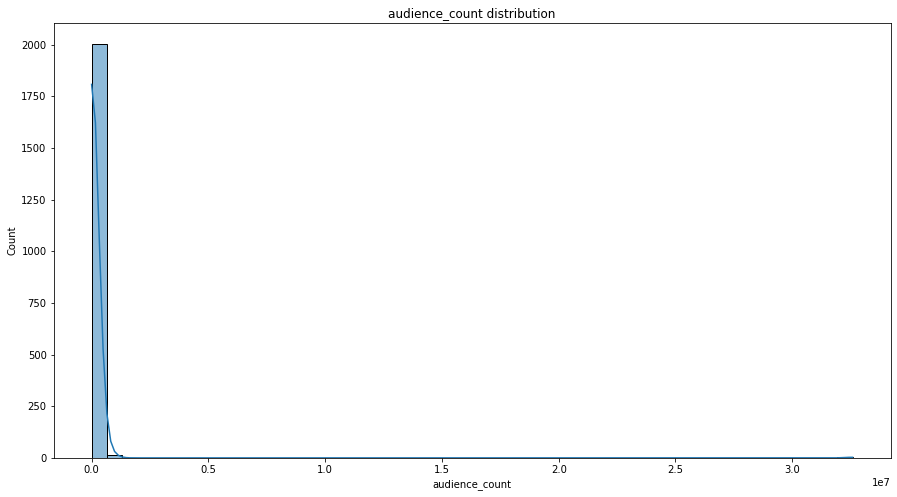

In [ ]:
print_info(horror_movies,'audience_count') 
create_hist_plot(horror_movies, 'audience_count',50)

Text(0.5, 1.0, 'audience_count distribution(Boxplot)')

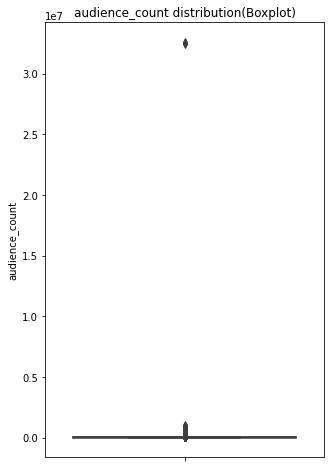

In [ ]:
fig, ax = plt.subplots(figsize=(5,8))
sns.boxplot(y=horror_movies['audience_count'])
plt.title('{} distribution(Boxplot)'.format('audience_count'))

Outliers!

In [ ]:
horror_movies[horror_movies['audience_count']>0.2*(10**6)]

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,main_genre
30,m/10004504-ultraviolet,Ultraviolet,"In the late 21st-century, a vampiric disease m...",An incomprehensible and forgettable sci-fi thr...,PG-13,"Action & Adventure, Drama, Horror, Science Fic...",Kurt Wimmer,Kurt Wimmer,"Milla Jovovich, Cameron Bright, Nick Chinlund,...",2006-03-03,...,Rotten,8.0,83.0,Spilled,30.0,279994.0,21,7,76,Action & Adventure
50,m/1000617-aliens,Aliens,"After floating in space for 57 years, Lt. Ripl...","While Alien was a marvel of slow-building, atm...",R,"Action & Adventure, Horror, Science Fiction & ...",James Cameron,James Cameron,"Sigourney Weaver, Carrie Henn, Michael Biehn, ...",1986-07-18,...,Certified-Fresh,97.0,76.0,Upright,94.0,429674.0,17,74,2,Action & Adventure
99,m/10008606-eye,The Eye,"Blind for most of her life, concert violinist ...",Featuring wooden performances and minimal scar...,PG-13,"Drama, Horror, Mystery & Suspense","David Moreau, Xavier Palud","Sebastian Gutierrez, Hillary Seitz","Jessica Alba, Alessandro Nivola, Parker Posey,...",2008-02-01,...,Rotten,21.0,80.0,Spilled,43.0,303458.0,13,17,63,Drama
132,m/10008954-untraceable,Untraceable,Special Agent Jennifer Marsh (Diane Lane) work...,"Despite Diane Lane's earnest effort, Untraceab...",R,"Drama, Horror, Mystery & Suspense",Gregory Hoblit,"Allison Burnett, Robert Fyvolent, Mark R. Brinker","Diane Lane, Billy Burke, Colin Hanks, Joseph C...",2008-01-25,...,Rotten,16.0,148.0,Spilled,52.0,225138.0,41,24,124,Drama
145,m/10009151-box,The Box,"A suburban couple, Norma (Cameron Diaz) and Ar...","Imaginative but often preposterous, The Box fe...",PG-13,"Horror, Mystery & Suspense, Science Fiction & ...",Richard Kelly,Richard Kelly,"Cameron Diaz, James Marsden, Frank Langella, J...",2009-11-06,...,Rotten,44.0,155.0,Spilled,24.0,359098.0,30,68,87,Horror
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17192,m/what_lies_beneath,What Lies Beneath,It had been a year since Dr. Norman Spencer (H...,Robert Zemeckis is unable to salvage an uncomp...,PG-13,"Drama, Horror, Mystery & Suspense",Robert Zemeckis,"Clark Gregg, Sarah Kernochan","Michelle Pfeiffer, Harrison Ford, Diana Scarwi...",2000-07-21,...,Rotten,46.0,125.0,Spilled,58.0,278987.0,31,58,67,Drama
17221,m/when_a_stranger_calls,When a Stranger Calls,"Far away from the site of a gruesome murder, a...",When a Stranger Calls ranks among the more mis...,PG-13,"Horror, Mystery & Suspense",Simon West,Jake Wade Wall,"Camilla Belle, Tessa Thompson, Brian Geraghty,...",2006-02-03,...,Rotten,9.0,93.0,Spilled,44.0,477438.0,18,8,85,Horror
17525,m/world-war-z,World War Z,When former U.N. investigator Gerry Lane (Brad...,"It's uneven and diverges from the source book,...",PG-13,"Action & Adventure, Horror, Science Fiction & ...",Marc Forster,"Matthew Michael Carnahan, J. Michael Straczyns...","Brad Pitt, Mireille Enos, James Badge Dale, Da...",2013-06-21,...,Fresh,66.0,277.0,Upright,72.0,305158.0,57,183,94,Action & Adventure
17637,m/young_frankenstein,Young Frankenstein,Respected medical lecturer Dr. Frederick Frank...,"Made with obvious affection for the original, ...",PG,"Classics, Comedy, Horror, Science Fiction & Fa...",Mel Brooks,"Mel Brooks, Gene Wilder","Gene Wilder, Peter Boyle, Marty Feldman, Madel...",1974-12-15,...,Certified-Fresh,94.0,67.0,Upright,92.0,209324.0,7,63,4,Classics


Text(0.5, 1.0, 'audience_count distribution(Boxplot)')

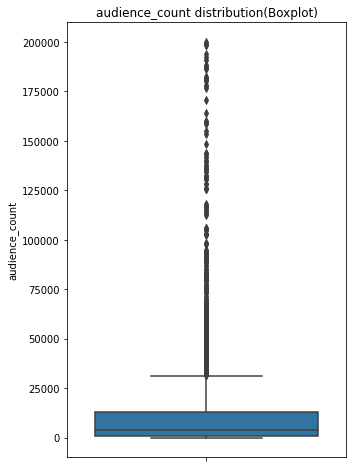

In [ ]:
no_outliers=horror_movies[horror_movies['audience_count']<0.2*(10**6)]
fig, ax = plt.subplots(figsize=(5,8))
sns.boxplot(y=no_outliers['audience_count'])
plt.title('{} distribution(Boxplot)'.format('audience_count'))

Description:
count        2001
unique          2
top       Spilled
freq         1483
Name: audience_status, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
         Count  Frequency (%)
Spilled   1483      74.112944
Upright    518      25.887056


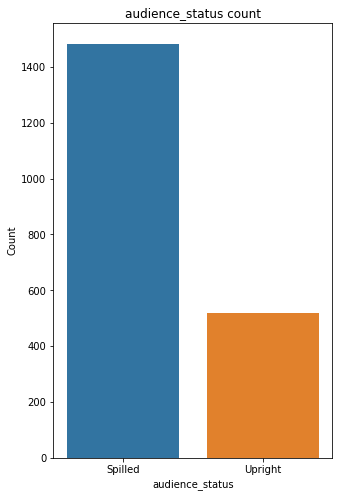

In [ ]:
print_info(horror_movies,'audience_status') 
create_bar_plot(horror_movies, 'audience_status')

### 2.9 audience rating

Description:
count    2024.000000
mean       46.402668
std        19.806089
min         0.000000
25%        31.000000
50%        44.000000
75%        61.000000
max       100.000000
Name: audience_rating, dtype: float64
**************************************************
Object type:
float64
**************************************************
Value count:
      Count  Frequency (%)
33.0     49       2.420949
39.0     47       2.322134
38.0     46       2.272727
44.0     45       2.223320
30.0     44       2.173913
...     ...            ...
95.0      2       0.098814
93.0      2       0.098814
7.0       1       0.049407
5.0       1       0.049407
96.0      1       0.049407

[93 rows x 2 columns]


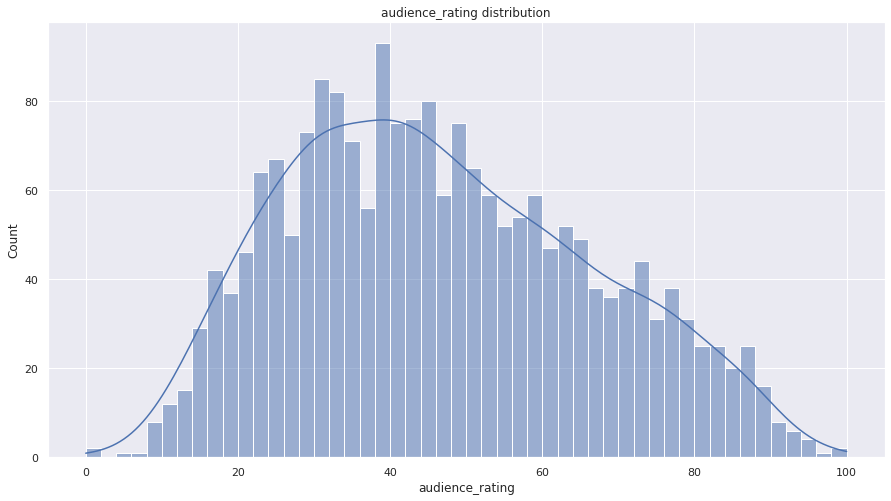

In [126]:
print_info(horror_movies,'audience_rating') 
create_hist_plot(horror_movies, 'audience_rating',50)

### 2.10 tomatometer top, fresh, and rotten critics_count

Description:
count    2043.000000
mean        9.494371
std        12.438855
min         0.000000
25%         1.000000
50%         4.000000
75%        13.000000
max        63.000000
Name: tomatometer_top_critics_count, dtype: float64
**************************************************
Object type:
int64
**************************************************
Value count:
    Count  Frequency (%)
0     429      20.998532
1     223      10.915321
2     152       7.440039
3     133       6.510034
4     116       5.677925
..    ...            ...
63      1       0.048948
58      1       0.048948
59      1       0.048948
52      1       0.048948
60      1       0.048948

[61 rows x 2 columns]


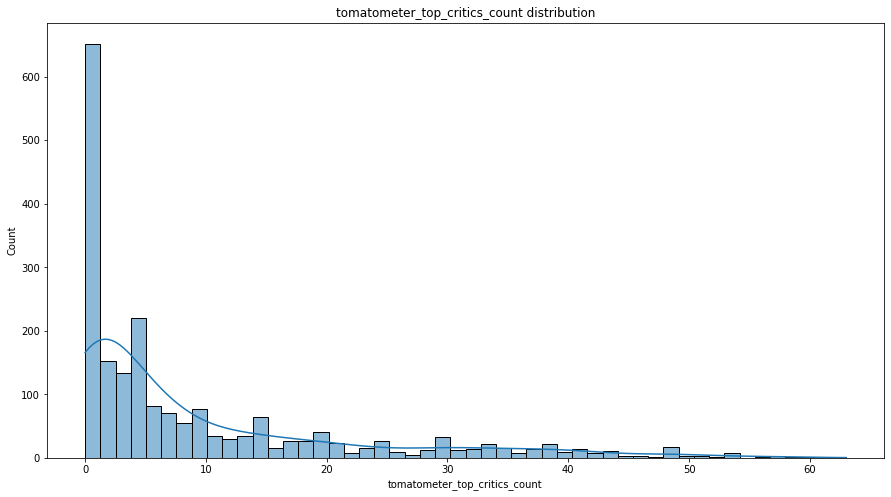

In [ ]:
print_info(horror_movies,'tomatometer_top_critics_count')
create_hist_plot(horror_movies,'tomatometer_top_critics_count',50)

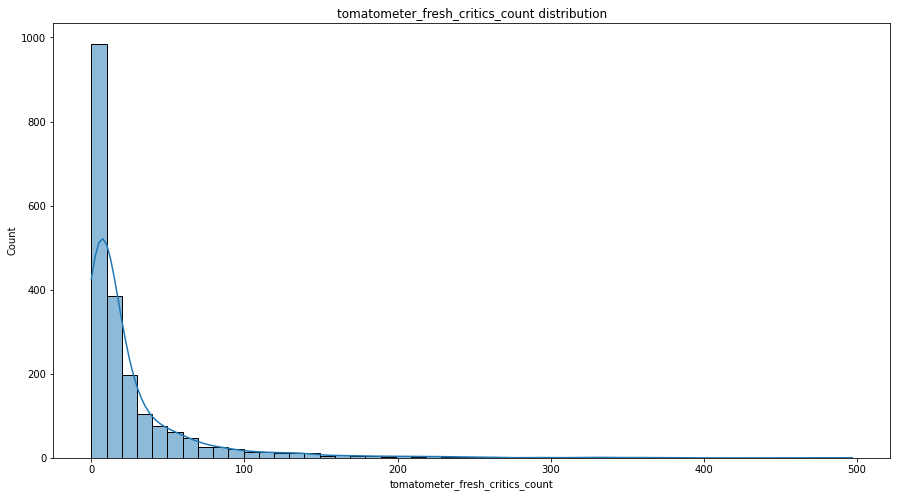

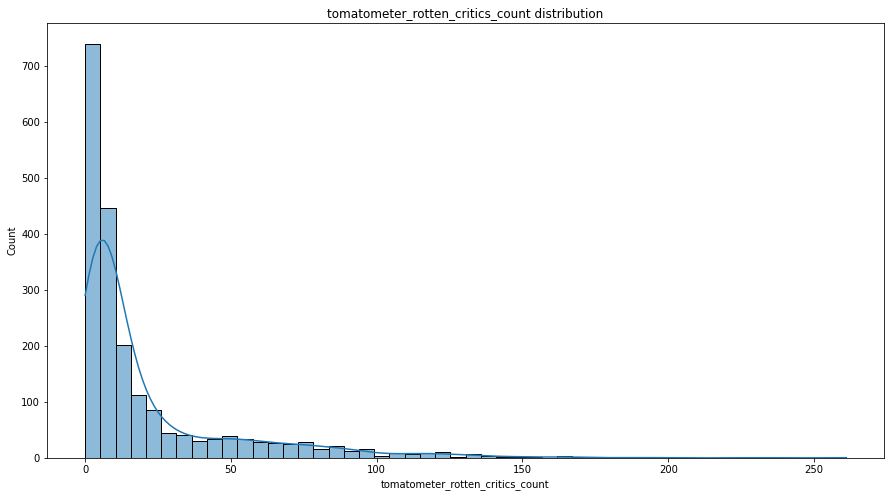

In [ ]:
create_hist_plot(horror_movies,'tomatometer_fresh_critics_count',50) 
create_hist_plot(horror_movies,'tomatometer_rotten_critics_count',50)  

### 2.11 directors, actors and authors

In [ ]:
print_info(horror_movies,'directors')

Description:
count           2013
unique          1431
top       Wes Craven
freq              16
Name: directors, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                    Count  Frequency (%)
Wes Craven             16       0.794834
John Carpenter         11       0.546448
George A. Romero       10       0.496771
Tobe Hooper             9       0.447094
Dario Argento           8       0.397417
...                   ...            ...
Stuart Hazeldine        1       0.049677
Eric Weston             1       0.049677
Matt Green              1       0.049677
Olatunde Osunsanmi      1       0.049677
Kevin Hamedani          1       0.049677

[1431 rows x 2 columns]


In [ ]:
print_info(horror_movies,'actors') 

Description:
count                                                  2033
unique                                                 2033
top       Hitomi Kuroki, Rio Kanno, Shigemitsu Ogi, Mire...
freq                                                      1
Name: actors, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                                                    Count  Frequency (%)
Hitomi Kuroki, Rio Kanno, Shigemitsu Ogi, Mirei...      1       0.049188
Andrew Robinson, Ami Dolenz, J. Trevor Edmond, ...      1       0.049188
Peter Fonda, Warren Oates, Loretta Swit, Lara P...      1       0.049188
Lior Ashkenazi, Ania Bukstein, Danny Geva, Yael...      1       0.049188
Laura Vandervoort, Benjamin Hollingsworth, C.M....      1       0.049188
...                                                   ...            ...
Alison Lohman, Justin Long, David Paymer, Reggi...      1       0.049188


In [ ]:
print_info(horror_movies,'authors') 

Description:
count            1925
unique           1681
top       Larry Cohen
freq                8
Name: authors, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                                              Count  Frequency (%)
Larry Cohen                                       8       0.415584
Marcus Dunstan, Patrick Melton                    7       0.363636
George A. Romero                                  7       0.363636
Wes Craven                                        7       0.363636
Stephen King                                      6       0.311688
...                                             ...            ...
Chris von Hoffmann, Aria Emory                    1       0.051948
David Loughery, Chuck Russell, Joseph Ruben       1       0.051948
William Goldman, Lawrence Kasdan                  1       0.051948
Kwok Cheung Tsang, Jimmy Wan, Ho-Cheung Pang      1       0.05194

### 2.12 related genres 

In [ ]:
l1= []
for i in horror_movies['genres'].str.split(','):
  if (i[0] == 'Horror') & (len(i)>1):
   l1.append(i[1])
  else:
    l1.append(i[0])
horror_movies['related_genre'] = l1

In [257]:
horror_movies.groupby('related_genre').rotten_tomatoes_link.count().sort_values()

related_genre
 Gay & Lesbian                  1
 Special Interest               1
 Romance                        1
 Western                        1
 Television                     2
 Musical & Performing Arts      3
 Kids & Family                  3
Animation                       9
Documentary                    12
Cult Movies                    16
 Science Fiction & Fantasy     74
Classics                      130
Comedy                        189
Art House & International     201
Action & Adventure            252
Drama                         291
 Mystery & Suspense           401
Horror                        456
Name: rotten_tomatoes_link, dtype: int64

In [258]:
t5=horror_movies.groupby('related_genre').tomatometer_rating.agg(['mean','count'])
t5.sort_values('count')

,mean,count
related_genre,,
Gay & Lesbian,0.000000,1
Special Interest,40.000000,1
Romance,10.000000,1
Western,51.000000,1
Television,35.500000,2
Musical & Performing Arts,61.000000,3
Kids & Family,60.000000,3
Animation,74.375000,8
Documentary,72.583333,12


In [259]:
t5.sort_values('mean')

,mean,count
related_genre,,
Gay & Lesbian,0.000000,1
Romance,10.000000,1
Television,35.500000,2
Special Interest,40.000000,1
Mystery & Suspense,45.832918,401
Action & Adventure,45.908730,252
Horror,46.516556,453
Cult Movies,48.250000,16
Western,51.000000,1


In [264]:
t5['mean'].mean()

49.119402725709875

In [262]:
t6=horror_movies.groupby('related_genre').tomatometer_count.agg(['mean'])
t6.sort_values('mean', ascending=False)

,mean
related_genre,
Romance,208.000000
Kids & Family,80.333333
Action & Adventure,61.261905
Drama,59.890034
Mystery & Suspense,56.553616
Science Fiction & Fantasy,43.013514
Horror,42.280353
Animation,42.125000
Comedy,39.444444


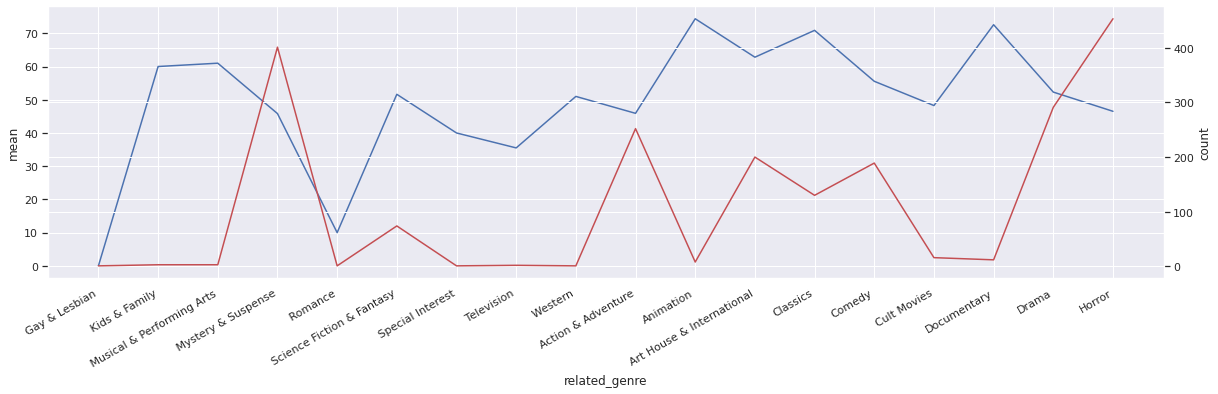

In [261]:
fig, ax = plt.subplots(figsize=(20,5))
sns.lineplot(y='mean', x=t5.index ,data=t5, ax=ax)
ax2 = ax.twinx()
sns.lineplot(y='count', x=t5.index ,data=t5, ax=ax2,color='r')
ax.set_xticklabels(t5.index,rotation=30,ha='right')
plt.show()

## **3.Bivariate analysis**


### 3.1 Numerical vs Numerical

In [ ]:
horror_movies.select_dtypes(include=np.number).columns

Index(['runtime', 'tomatometer_rating', 'tomatometer_count', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count'],
      dtype='object')

#### 3.1.1 Pair plot 

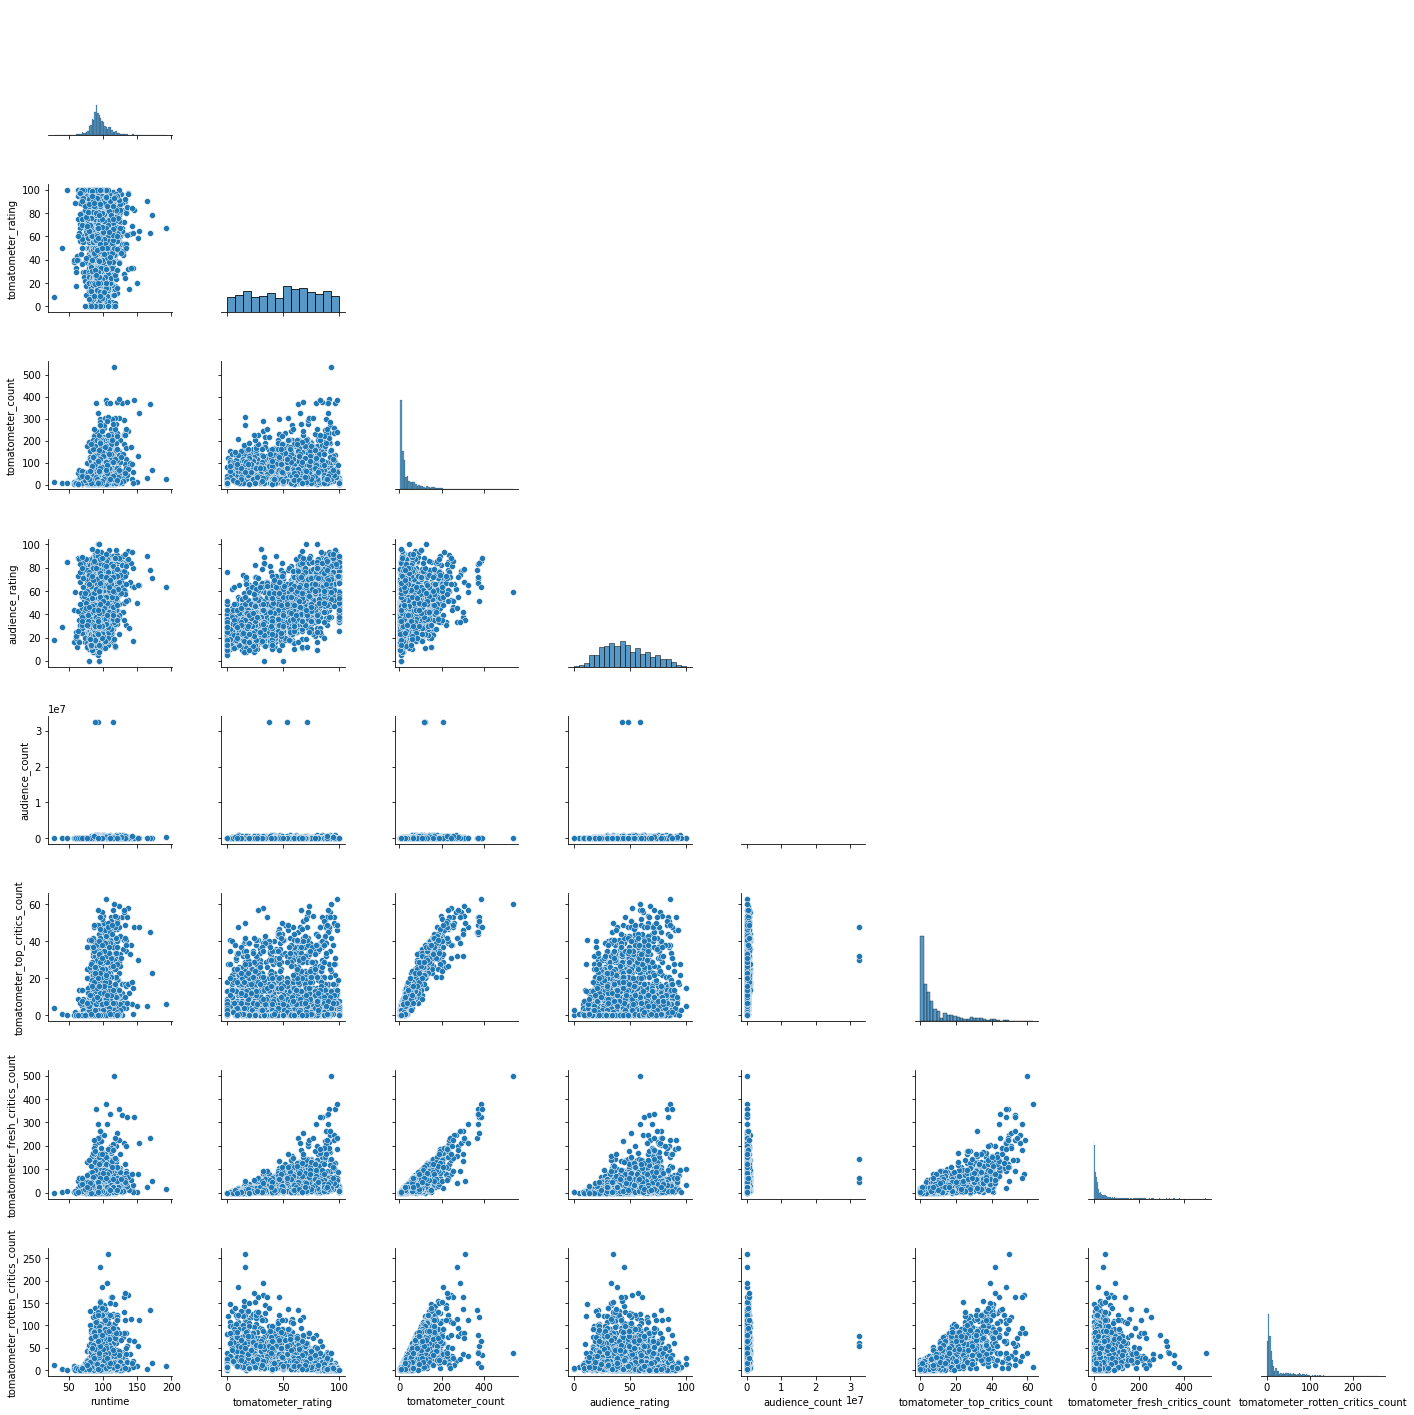

In [ ]:
sns.pairplot(horror_movies.select_dtypes(include=np.number),corner=True)
plt.show()

#### 3.1.2 tomatometer_rating vs audience_rating

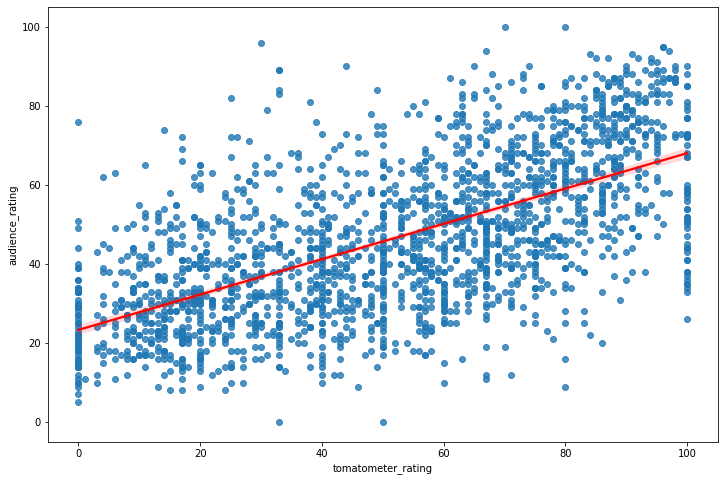

In [ ]:
# one numerical vs one numerical - Scatter plots
fig, ax = plt.subplots(figsize=(12,8))
sns.regplot(x='tomatometer_rating',y='audience_rating',data=horror_movies,line_kws={'color': 'red'})
plt.show()

#### 3.1.3 tomatometer_count vs tomatometer_top_critics_count

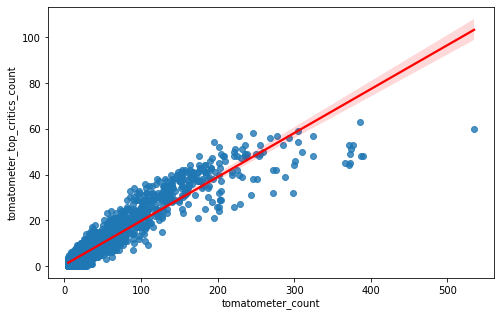

In [ ]:
# one numerical vs one numerical - Scatter plots
fig, ax = plt.subplots(figsize=(8,5))
sns.regplot(x='tomatometer_count',y='tomatometer_top_critics_count',data=horror_movies,line_kws={'color': 'red'})
plt.show()

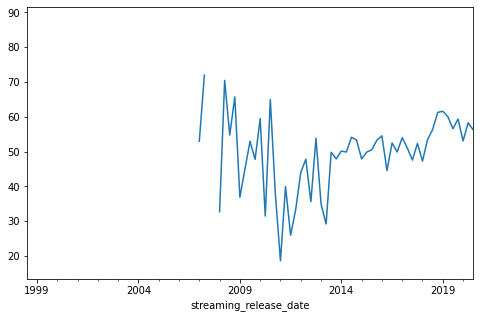

In [ ]:
d = horror_movies.groupby(pd.Grouper(key='streaming_release_date', freq='Q')).mean()['tomatometer_rating']
fig, ax = plt.subplots(figsize=(8,5))
d.plot(use_index=True)

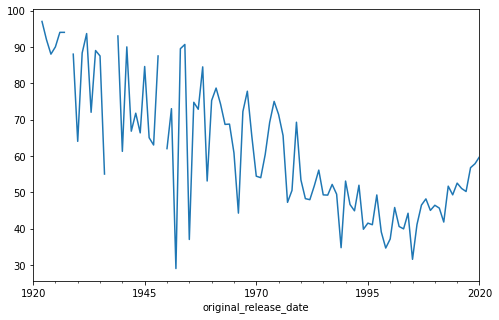

In [ ]:
d = horror_movies.groupby(pd.Grouper(key='original_release_date', freq='Y')).mean()['tomatometer_rating']
fig, ax = plt.subplots(figsize=(8,5))
d.plot(use_index=True)

#### 3.1.4 corrlation analysis

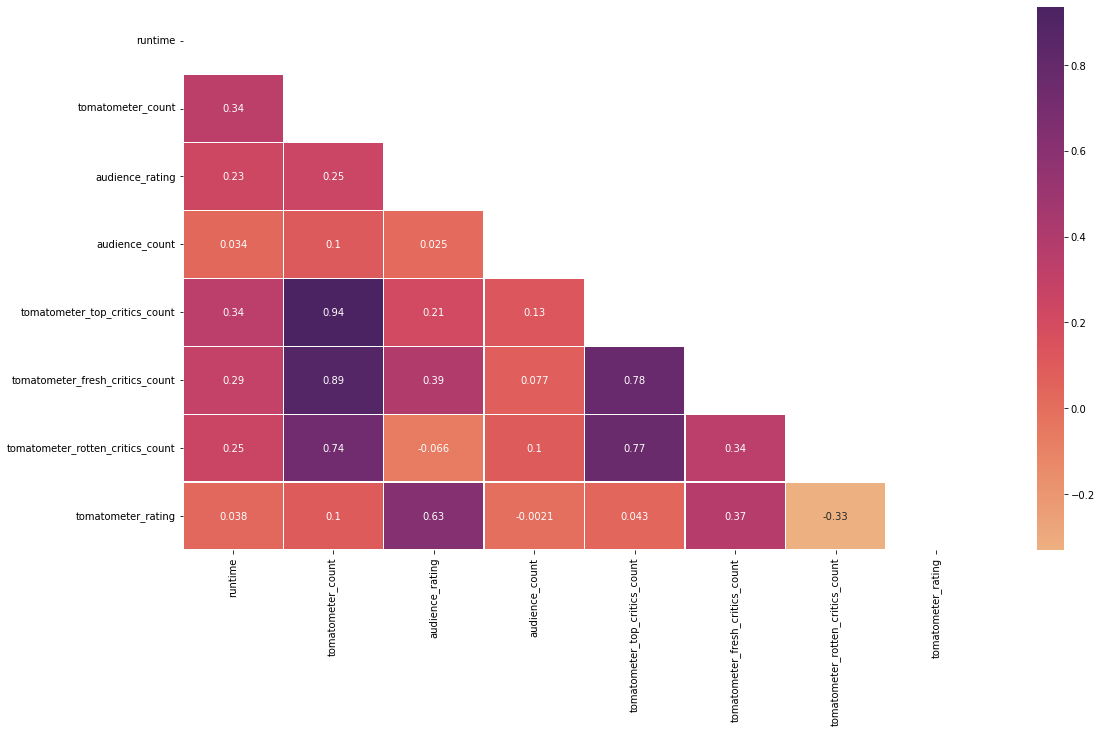

In [ ]:
# correlation analysis with heatmap  - target column is int 
df = pd.concat([horror_movies.drop('tomatometer_rating',axis=1),horror_movies.tomatometer_rating],axis=1).corr()
# Get the lower triangle of the correlation matrix
# Generate a mask for the upper triangle
mask = np.zeros_like(df, dtype='bool')
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(18,10))
# seaborn heatmap
sns.heatmap(df, annot=True, cmap='flare',mask=mask, linewidths=.5)
# plot the heatmap
plt.show()

- audience rating and tomatometer fresh count that are correlated with target feature
- tomatometer top/fresh/rotten critices count are highly correlated with tomatometer count since majority of the tomatometer status are Rotten and Fresh.
Thus, we should consider only keeping one feature among them.


### 3.2 Numerical vs Categorical (ANOVA)

In [ ]:
horror_movies.select_dtypes(include=object).columns

Index(['rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'production_company', 'tomatometer_status', 'audience_status',
       'main_genre'],
      dtype='object')

#### 3.2.1 tomatometer counts vs. all categorical features

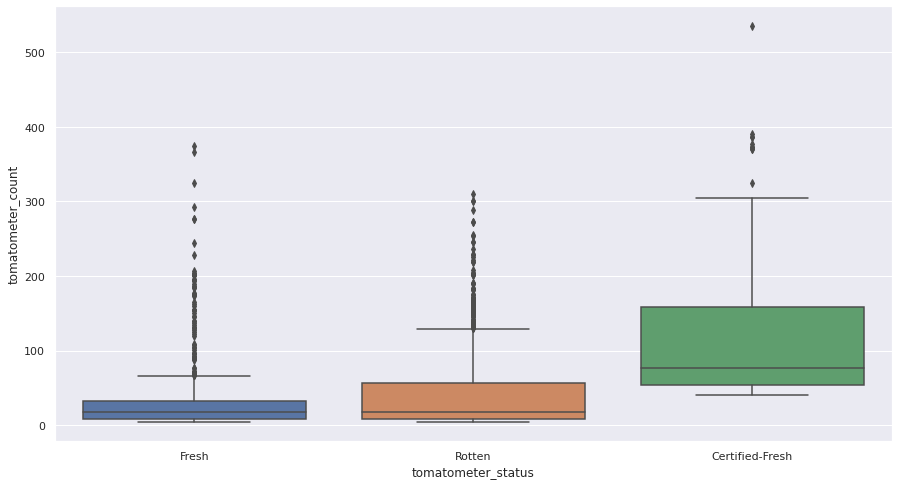

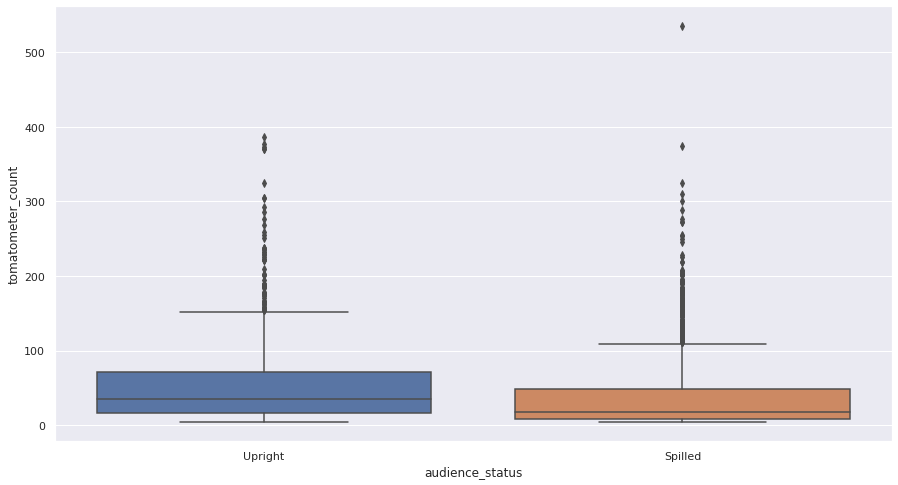

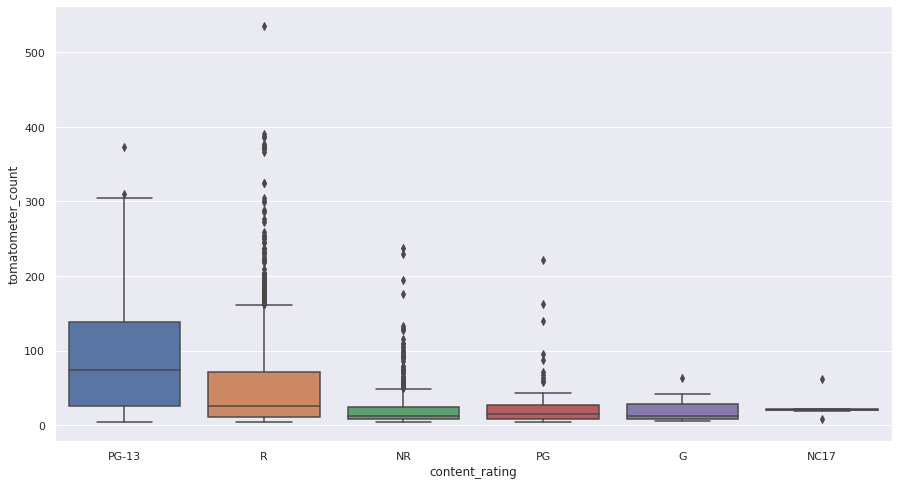

In [128]:
cat_features = ['tomatometer_status', 'audience_status', 'content_rating']
for i in range(len(cat_features)):
  sns.boxplot(x = horror_movies[cat_features[i]], y = horror_movies['tomatometer_count'])
  ax.set_title(cat_features[i]+'vs tomatometer_count')
  plt.ylabel('tomatometer_count')
  plt.show()

#### 3.2.2 runtime vs categorical features

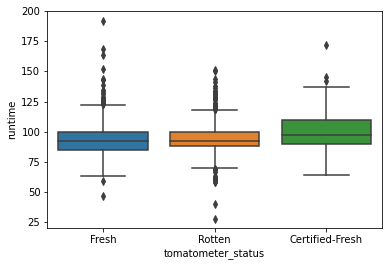

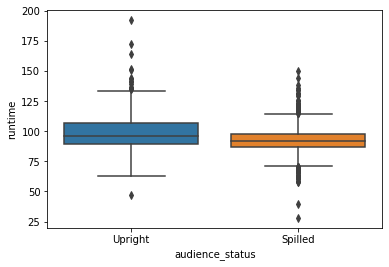

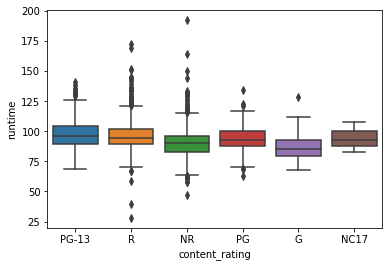

In [ ]:
for i in range(len(cat_features)):
  sns.boxplot(x = horror_movies[cat_features[i]], y = horror_movies['runtime'])
  ax.set_title(cat_features[i]+'vs runtime')
  plt.ylabel('runtime')
  plt.show()

#### 3.2.3 production_company vs rating

In [75]:
company_groupby = horror_movies.groupby('production_company').tomatometer_rating.agg(['mean','count'])
a = company_groupby.sort_values('count',ascending=False).head(10)
a

,mean,count
production_company,,
Universal Pictures,56.487500,80
Warner Bros. Pictures,47.078431,51
Sony Pictures Home Entertainment,42.060000,50
Paramount Pictures,55.625000,48
IFC Films,53.645833,48
Anchor Bay Entertainment,46.459459,37
Warner Home Video,53.771429,35
MGM,42.885714,35
20th Century Fox,53.392857,28


In [86]:
print_info(company_groupby,'count')

Description:
count    671.000000
mean       2.916542
std        6.336500
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       80.000000
Name: count, dtype: float64
**************************************************
Object type:
int64
**************************************************
Value count:
    Count  Frequency (%)
1     466      69.448584
2      68      10.134128
3      40       5.961252
4      16       2.384501
6      14       2.086438
5       9       1.341282
7       8       1.192250
15      7       1.043219
9       6       0.894188
8       4       0.596125
11      4       0.596125
21      2       0.298063
12      2       0.298063
48      2       0.298063
26      2       0.298063
27      2       0.298063
17      2       0.298063
35      2       0.298063
10      2       0.298063
14      2       0.298063
19      2       0.298063
18      1       0.149031
16      1       0.149031
80      1       0.149031
50      1       0.149031
28      1      

In [100]:
removed = company_groupby[company_groupby['count']>5]

In [91]:
percentile25 = removed["count"].quantile(0.25)
percentile75 = removed["count"].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

removed[removed["count"] > upper_limit]
removed[removed["count"] < lower_limit]

new_df = removed[removed["count"] < upper_limit]
new_df.shape

(63, 2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

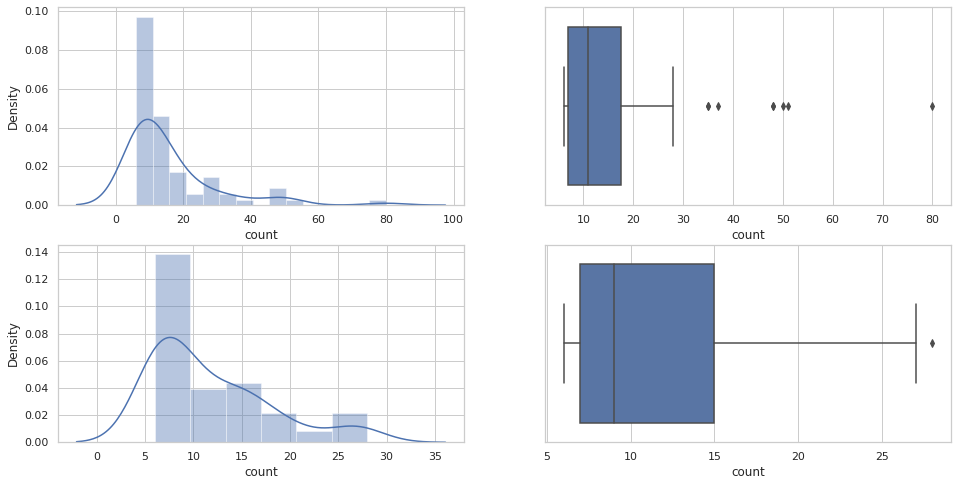

In [92]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(removed["count"])
plt.subplot(2,2,2)
sns.boxplot(removed["count"])
plt.subplot(2,2,3)
sns.distplot(new_df['count'])
plt.subplot(2,2,4)
sns.boxplot(new_df['count'])
plt.show()

In [93]:
print_info(new_df,'count')

Description:
count    63.000000
mean     11.777778
std       6.173420
min       6.000000
25%       7.000000
50%       9.000000
75%      15.000000
max      28.000000
Name: count, dtype: float64
**************************************************
Object type:
int64
**************************************************
Value count:
    Count  Frequency (%)
6      14      22.222222
7       8      12.698413
15      7      11.111111
9       6       9.523810
11      4       6.349206
8       4       6.349206
26      2       3.174603
19      2       3.174603
21      2       3.174603
12      2       3.174603
27      2       3.174603
17      2       3.174603
10      2       3.174603
14      2       3.174603
16      1       1.587302
28      1       1.587302
13      1       1.587302
18      1       1.587302


The movie count distribution is very skewed, so we remove companies with only 1 or 2 movies

In [29]:
print_info(company_groupby,'mean')

Description:
count    670.000000
mean      54.018314
std       25.462007
min        0.000000
25%       37.083333
50%       54.916667
75%       74.000000
max      100.000000
Name: mean, dtype: float64
**************************************************
Object type:
float64
**************************************************
Value count:
            Count  Frequency (%)
50.000000      22       3.283582
100.000000     20       2.985075
67.000000      19       2.835821
0.000000       18       2.686567
80.000000      17       2.537313
...           ...            ...
54.777778       1       0.149254
72.500000       1       0.149254
79.500000       1       0.149254
71.666667       1       0.149254
57.900000       1       0.149254

[229 rows x 2 columns]


In [30]:
print(company_groupby[company_groupby['mean']==0])
print(company_groupby[company_groupby['mean']==0].shape)

                                    mean  count
production_company                             
Animus Films                         0.0      1
Astra Films                          0.0      1
Black & Blue                         0.0      1
Campbell Grobman Films               0.0      1
Continental Home Video               0.0      1
ITC Entertainment                    0.0      1
Kadokawa Shoten Publishing Company   0.0      1
Pelican Point Media                  0.0      1
Relativity Studios                   0.0      1
Rhino Home Video                     0.0      1
Saban Films and Lionsgate            0.0      1
Scary Movies LLC                     0.0      1
Sinister Cinema                      0.0      1
Starmaker Entertainment              0.0      1
Underhill Films                      0.0      1
Vestron Pictures Ltd.                0.0      1
Willing Suspension Films             0.0      1
Wrekin Hill                          0.0      1
(18, 2)


In [31]:
print(company_groupby[company_groupby['mean']==100])
print(company_groupby[company_groupby['mean']==100].shape)

                               mean  count
production_company                        
Aphasia Films                 100.0      1
Cherry Sky Films              100.0      1
Dark Elegy Films              100.0      1
Eclectic Pictures             100.0      1
Energize Students             100.0      1
Fairway International         100.0      1
Finecut                       100.0      1
Global                        100.0      1
Grand Entertainment           100.0      1
HPLHS Motion Pictures         100.0      1
House Lights Media            100.0      1
Lab of Madness                100.0      1
Lamberto Forni Film (LF)      100.0      1
Monarch Home Entertainment    100.0      1
Office Walker                 100.0      1
PRC Pictures Inc.             100.0      1
Projektions- AG Union (PAGU)  100.0      1
RKO Radio Pictures Inc.       100.0      1
Schattenkante                 100.0      1
The Brain Factory             100.0      1
(20, 2)


In [102]:
print(company_groupby[company_groupby['mean']>95])
print(company_groupby[company_groupby['mean']>95].shape)

                                 mean  count
production_company                          
Aphasia Films                   100.0      1
Cherry Sky Films                100.0      1
Cohen Media                      96.0      1
Compass International Pictures   96.0      1
Continental Distributing Inc.    97.0      1
Dark Elegy Films                100.0      1
Eclectic Pictures               100.0      1
Energize Students               100.0      1
Fairway International           100.0      1
Film Arts Guild                  97.0      1
Finecut                         100.0      1
Free Lunch Productions           96.0      1
General Foreign Sales Corp.      97.0      1
Global                          100.0      1
Grand Entertainment             100.0      1
HPLHS Motion Pictures           100.0      1
House Lights Media              100.0      1
Lab of Madness                  100.0      1
Lamberto Forni Film (LF)        100.0      1
Magnet/Magnolia Pictures         98.0      1
Monarch Ho

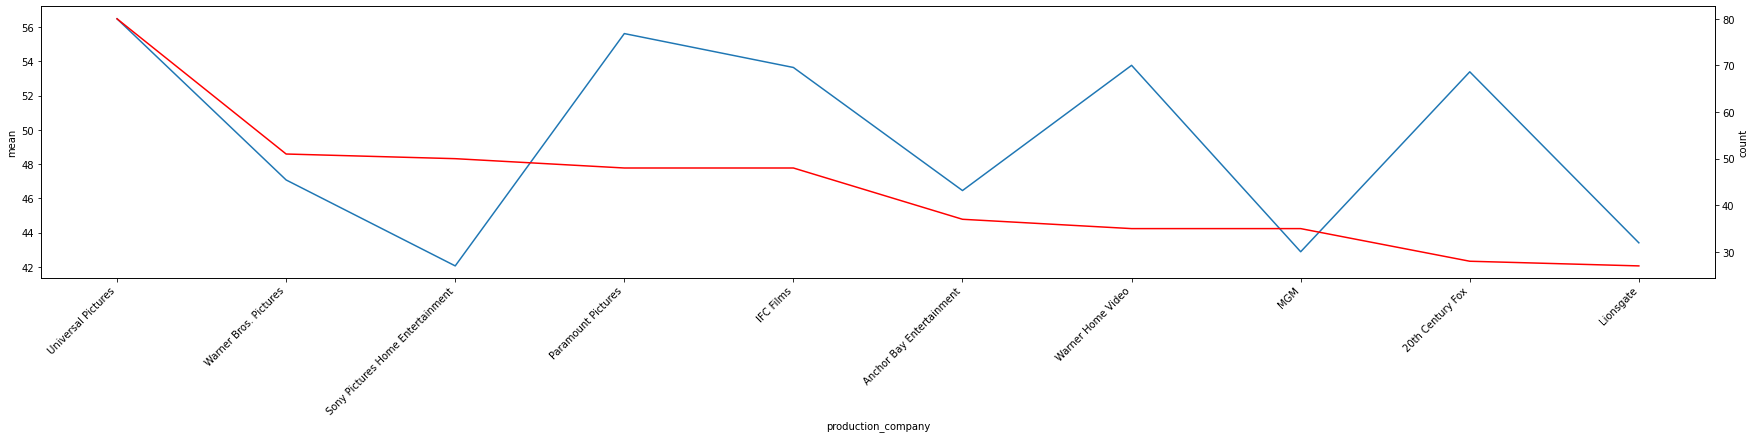

In [42]:
fig, ax = plt.subplots(figsize=(30,5))
sns.lineplot(y='mean', x=a.index ,data=a, ax=ax)
ax2 = ax.twinx()
sns.lineplot(y='count', x=a.index ,data=a, ax=ax2,color='r')
ax.set_xticklabels(a.index,rotation=45,ha='right')
plt.show()

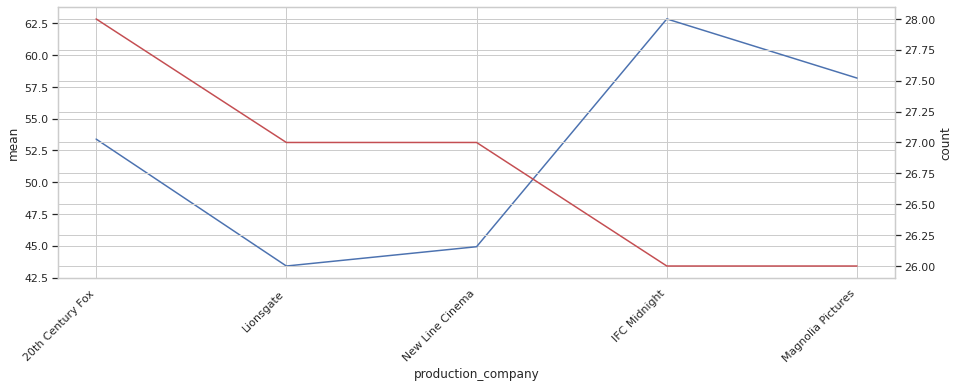

In [99]:
b = new_df.sort_values('count',ascending=False).head(5)

fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(y='mean', x=b.index ,data=b, ax=ax)
ax2 = ax.twinx()
sns.lineplot(y='count', x=b.index ,data=b, ax=ax2,color='r')
ax.set_xticklabels(b.index,rotation=45,ha='right')
plt.show()

#### 3.2.4 directors vs rating 

In [ ]:
directors_groupby = horror_movies.groupby('directors').tomatometer_rating.agg(['mean','count'])
b = directors_groupby.sort_values('count',ascending=False).head(20)
b

,mean,count
directors,,
Wes Craven,49.312500,16
John Carpenter,59.090909,11
George A. Romero,66.200000,10
Tobe Hooper,54.888889,9
David Cronenberg,81.750000,8
Dario Argento,70.875000,8
Roger Corman,76.250000,8
Terence Fisher,78.000000,7
Brian DePalma,75.285714,7


In [ ]:
sad_dictors = directors_groupby[directors_groupby['mean']==0]
print(sad_dictors)
print(directors_groupby[directors_groupby['mean']==0].shape)

                                                    mean  count
directors                                                      
Arch W. Hall Sr., Arch Hall Jr., Arch Hall Sr.,...   0.0      1
Bernard McEveety                                     0.0      1
Bob Logan                                            0.0      1
D.J. Caruso                                          0.0      1
Daniel Tucker                                        0.0      1
Darin Scott                                          0.0      1
Dario Piana                                          0.0      1
David Blyth, Jim Isaac, James Isaac                  0.0      1
Denis Rovira                                         0.0      1
Dennis Donnelly                                      0.0      1
Donald P. Borchers                                   0.0      1
Eric Valette                                         0.0      1
George Dugdale, Mark Ezra, Peter Litten              0.0      1
Gregg Hale, Liam O'Donnell, Eduardo Sánc

In [ ]:
sad_dictors

,mean,count
directors,,
"Arch W. Hall Sr., Arch Hall Jr., Arch Hall Sr., Nicholas Merriwether",0.0,1
Bernard McEveety,0.0,1
Bob Logan,0.0,1
D.J. Caruso,0.0,1
Daniel Tucker,0.0,1
Darin Scott,0.0,1
Dario Piana,0.0,1
"David Blyth, Jim Isaac, James Isaac",0.0,1
Denis Rovira,0.0,1


In [ ]:
directors_company_groupby=horror_movies.groupby(['directors','production_company']).tomatometer_rating.agg(['mean','count']).reset_index(inplace=False)
directors_company_groupby[directors_company_groupby['mean']==0].groupby('production_company').directors.count().sort_values(ascending=False)

production_company
Trimark                                  3
Warner Home Video                        3
WARNER BROTHERS PICTURES                 2
Gravitas Ventures                        2
Lorimar Productions                      2
Vertical Entertainment                   2
Sony Pictures Home Entertainment         2
Miramax                                  2
Anchor Bay Entertainment                 2
Rhino Home Video                         1
Sony Pictures Entertainment              1
Saban Films and Lionsgate                1
Scary Movies LLC                         1
Relativity Studios                       1
Screen Media Films                       1
Sinister Cinema                          1
Roadside Attractions                     1
American International Pictures          1
Starmaker Entertainment                  1
Pelican Point Media                      1
Underhill Films                          1
United Artists                           1
Unknown                            

#### 3.2.4 Year vs rating & counts

selecting movies with original released year after 1998, since streaming release year started in 1998

In [ ]:
horror_movies['original_year'] = pd.DatetimeIndex(horror_movies['original_release_date']).year

original_year
2020.0    59.750000
2019.0    57.845238
2018.0    56.756410
2015.0    52.508197
2013.0    51.671053
2016.0    51.030303
2017.0    50.200000
2014.0    49.283784
2008.0    48.173077
2007.0    46.459016
2010.0    46.416667
2001.0    45.800000
2011.0    45.636364
2009.0    45.000000
2004.0    44.219512
2012.0    41.796875
2006.0    41.105263
2002.0    40.567568
2003.0    39.918919
1998.0    39.076923
2000.0    37.133333
1999.0    34.640000
2005.0    31.536585
Name: tomatometer_rating, dtype: float64


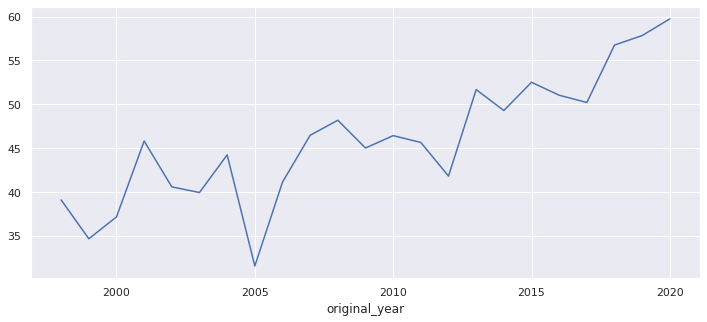

In [129]:
t= horror_movies[horror_movies['original_year']>=1998].groupby('original_year').mean()['tomatometer_rating'].sort_values(ascending=False)
print(t)
fig, ax = plt.subplots(figsize=(12,5))
sns.lineplot(x=t.index, y=t.values)

original_year
2019.0    6758.0
2018.0    5478.0
2017.0    4664.0
2009.0    4439.0
2013.0    4438.0
2012.0    4212.0
2016.0    4182.0
2007.0    3956.0
2010.0    3727.0
2015.0    3653.0
2006.0    3626.0
2005.0    3615.0
2011.0    3037.0
2014.0    2893.0
2004.0    2806.0
2003.0    2797.0
2002.0    2540.0
2020.0    2463.0
2008.0    2149.0
2000.0    2060.0
1999.0    1481.0
2001.0    1391.0
1998.0     996.0
Name: tomatometer_count, dtype: float64


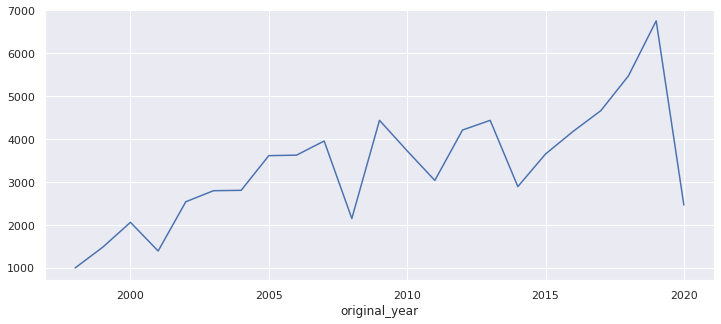

In [130]:
t1= horror_movies[horror_movies['original_year']>=1998].groupby('original_year').sum()['tomatometer_count'].sort_values(ascending=False)
print(t1)
fig, ax = plt.subplots(figsize=(12,5))
sns.lineplot(x=t1.index, y=t1.values)

Check out blog post for more fun insights!